# Visualizing Earnings Based on College Major

In this project we're going to use pandas plotting along with visualizations to explore the dataset of job outcomes of students who graduated from 2010 to 2012. Each row in the dataset represents a different college major and has information including median salaries, gender diversity, employment rates and so on along the columns.

Our goal is to answer questions such as;
-  Do students in more popuar majors make more money ?
-  How many majors are predominantly male and female ?
- Which category of majors have the most students ?

In [4]:
# import pandas and matplotlib libraries, read csv into a dataframe
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
recent_grads = pd.read_csv('recent-grads.csv')

Descriptions for each column:

- Rank : Rank by median earnings (dataset is ordered by rank column)
- Major_code : Major code
- Major : Description of major
- Major_category : Category of major
- Total : Total number of people with major
- Sample_size : Same size (unweighted) of full-time
- Men : Male graduates
- Women : Women graduates
- ShareWomen : Women as share of total
- Employed : Number employed
- Median : Median salary of full-time, year-round workers 
- Low_wage_jobs : Number in low-wage service jobs
- Full_time : Number employed 35 hours or more per week
- Part_time : Number employed less than 35 hours per week

Lets use iloc to return the first row formatted as a table, head()/tail() to see how the data is structured and describe() to get summary statistics for all the numeric columns.

In [39]:
# return first row as a table
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [40]:
# view how the data is structured
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [43]:
#last 5 rows of the data set
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [30]:
# summary statistics for numerical columns
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


Since matplotlib expects that columns of values we pass in to have matching lengths we'll drop rows with missing values with dropna().

In [17]:
recent_grads = recent_grads.dropna()

# **ScatterPlots**

Next we're going to use scatter plots to answer the following questions :
1. Do students in more popular majors make more money ?
2. Do students that majored in subjects that were majority female make more money ?
3. Is there any link between the number of full-time employees and median salary ?

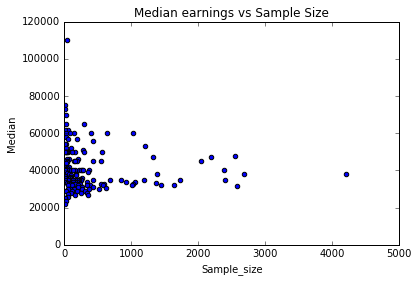

In [47]:
#Sample_size & Median earnings scatter
ax = recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Median earnings vs Sample Size', xlim=(0,5000))

Since a large amount of our plots are bunched together we can take a closer look by setting the ylim for sample_size between 0 and 1000.

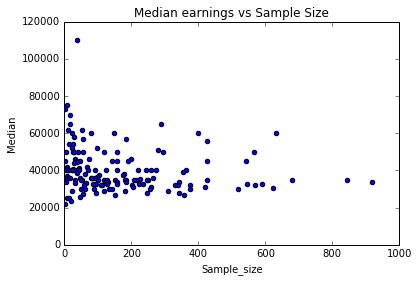

In [36]:
# closer look into the above graph
ax = recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Median earnings vs Sample Size', xlim=(0,1000))

 **1) Do students in popular majors make more money ?** 

From the scatter plot above we can come to the conclusion that popular majors do not necessarily make more money as there is no strong correlation between the median and sample size.

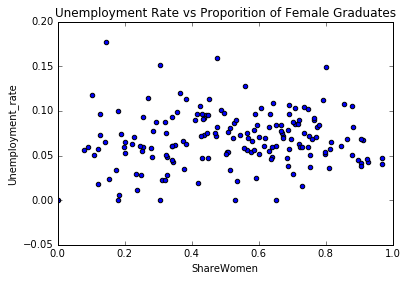

In [41]:
#ShareWomen & Unemployment_rate scatter
ax = recent_grads.plot(x='ShareWomen',y='Unemployment_rate',kind='scatter', xlim=(0,1))
ax.set_title('Unemployment Rate vs Proporition of Female Graduates')

The scatter plot above shows weak correlation between the unemployment rate and the proporition of female graduates

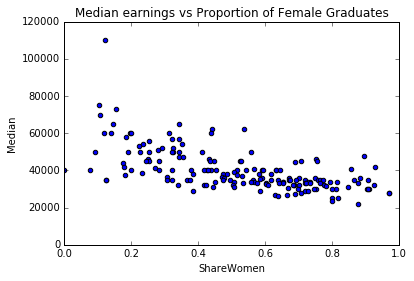

In [44]:
#ShareWomen and Median earnings scatter
ax = recent_grads.plot(x='ShareWomen', y='Median', kind='scatter',xlim=(0,1.0))
ax.set_title('Median earnings vs Proportion of Female Graduates')

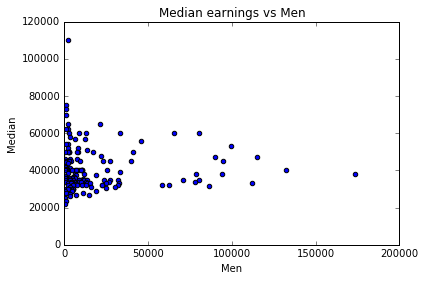

In [45]:
#Men and Median earnings scatter
ax = recent_grads.plot(x='Men',y='Median',kind='scatter', xlim=(0,200000))
ax.set_title('Median earnings vs Men')

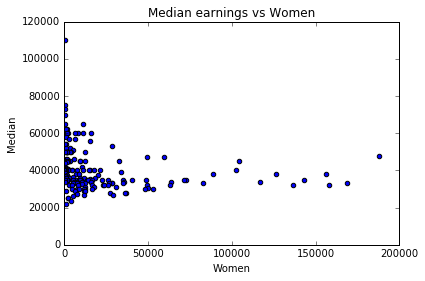

In [48]:
#Women and Median earnings scatter
ax = recent_grads.plot(x='Women',y='Median',kind='scatter', xlim=(0,200000))
ax.set_title('Median earnings vs Women')

** 2) Do students that majored in subjects that were majority female make more money ? **

No, there is no correlation between higher earnings and subjects that were majored in that were majority female. We can see that the higher the proporition of women the lower the median salary. This can be due to a number of reasons, possibly there is a large number of these plots are majors that are in fields that pay lower than some of the high paying fields. Keep in mind the median earnings is based of full time employees (40+ hours a week) so we can rule out the possbility that some of these plots are based off part time earnings.

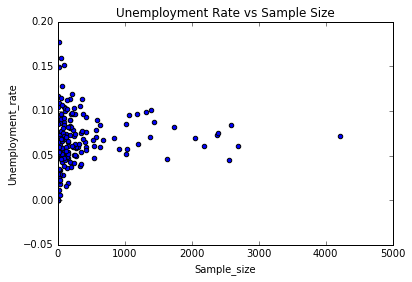

In [37]:
#Sample_size & Unemployment scatter
ax = recent_grads.plot(x='Sample_size',y='Unemployment_rate',kind='scatter', xlim=(0,5000))
ax.set_title('Unemployment Rate vs Sample Size')

We can see a lot of variance in unemployment rates for majors with small sample sizes.

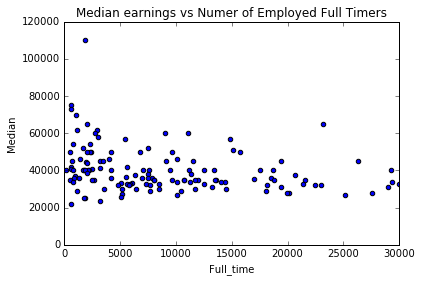

In [49]:
#Full_time & median scatter
ax = recent_grads.plot(x='Full_time',y='Median',kind='scatter', xlim=(0,30000), ylim=(0,120000))
ax.set_title('Median earnings vs Numer of Employed Full Timers')

 **3. Is there any link between the number of full-time employees and median salary ?  **
 
 There is not much correlation between the number of full-time employees and median earnings, if there was a relationship it would be a positive one though as more full-time employees leads to higher median earnings.

# **Histograms**

Next we're going to use histograms to explore the distributions of the following columns:
- Sample_size
- Median
- Employed
- Full_time
- ShareWomen
- Unemployment_rate
- Men
- Women

We will also experiment each with different bin sizes.

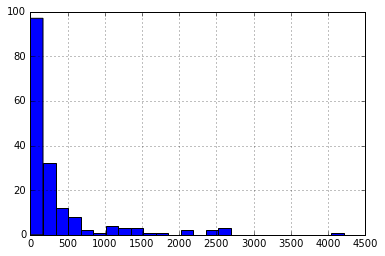

In [53]:
recent_grads['Sample_size'].hist(bins = 25)

Since the majority is between 0 and 500 we'll examine that range closer.

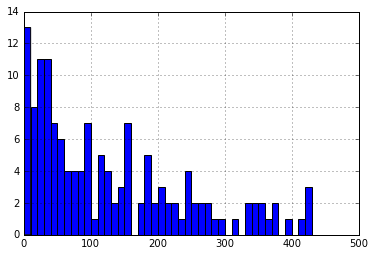

In [60]:
recent_grads['Sample_size'].hist(bins=50, range=(0,500))